## MY TASK

First, import the libraries:

In [266]:
#!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge folium=0.5.0 --yes
#!conda install -c conda-forge wikipedia --yes


import wikipedia as wp
import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim 
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt

### Question 1

In [267]:
#Load data
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
df = pd.read_html(html, header = 0)[0]
df.shape
#omit data where Borough is not assigned
df = df[df.Borough != "Not assigned"]
#group by postcode and borough
df.groupby(["Postcode", "Borough"])['Neighbourhood'].apply(', '.join).reset_index()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


**Important steps in the data analysis for the next lines of code:**
1. a postal code area consists of more than one neighbourhood, which is why we can combine these two rows with the groupby method
2. furthermore we have cells with an assigned neighbourhood and we can assign their boroughs as their neighbourhood
3. the issue here is then that we have duplicates in our borough, which is why we need to remove it:

In [268]:
#1
df= df.groupby('Postcode').agg(lambda x: ','.join(x))
#2
df.loc[df['Neighbourhood']=="Not assigned",'Neighbourhood']=df.loc[df['Neighbourhood']=="Not assigned",'Borough']
#3
df['Borough']= df['Borough'].str.replace('nan|[{}\s]','').str.split(',').apply(set).str.join(',').str.strip(',').str.replace(",{2,}",",")
df

,Borough,Neighbourhood
Postcode,,
M1B,Scarborough,"Rouge,Malvern"
M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
M1E,Scarborough,"Guildwood,Morningside,West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae
M1J,Scarborough,Scarborough Village
M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"


In [269]:
df.shape

(103, 2)

### Question 2

**First we import the spatial data (Latitude, Longitude) for the postal codes.**

In [270]:
# The code was removed by Watson Studio for sharing.

,Latitude,Longitude
Postcode,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


**We then merge out spatial data with the data we cleared beforehand to generate the following table.**

In [271]:
df = df.join(spatial_data)
df

,Borough,Neighbourhood,Latitude,Longitude
Postcode,,,,
M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
M1G,Scarborough,Woburn,43.770992,-79.216917
M1H,Scarborough,Cedarbrae,43.773136,-79.239476
M1J,Scarborough,Scarborough Village,43.744734,-79.239476
M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476


### Question 3
**This analysis will be performed on the Boroughs that contain the word Toronto**

In [272]:
df = df[df['Borough'].str.contains("Toronto")].reset_index(drop=True)

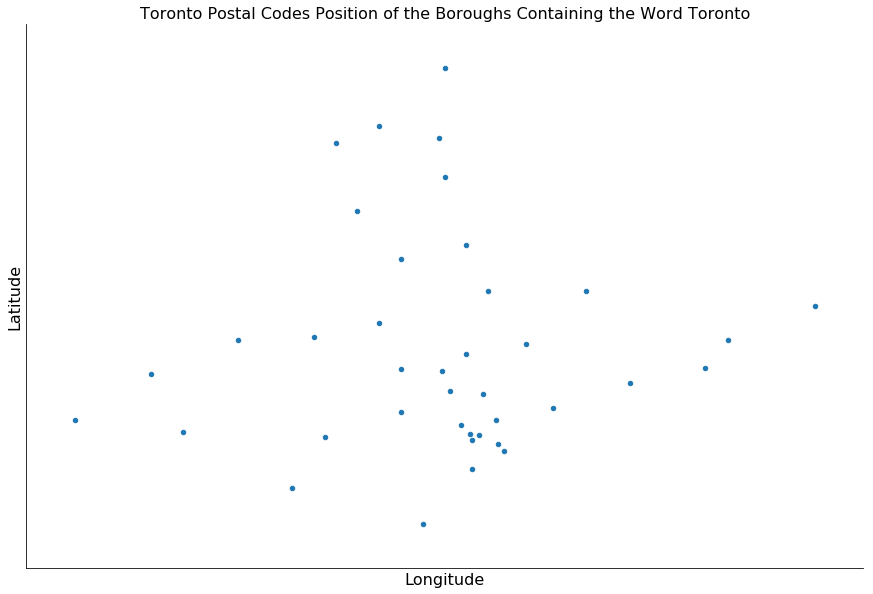

In [273]:
X = df[['Longitude', 'Latitude']]

scatter_plot = X.plot.scatter(x='Longitude', 
               y='Latitude',  
               fontsize = 16,
               figsize=(15, 10))

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
scatter_plot.set_title('Toronto Postal Codes Position of the Boroughs Containing the Word Toronto', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()

**Next we create a map of Toronto Neighbourhoods with markers**

In [274]:
address = 'Toronto, Ontario Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#87cefa',
        fill_opacity=0.5,
        parse_html=False).add_to(map_toronto)
map_toronto

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


**To segment neighbourhoods we need Foursquare API**

In [275]:
CLIENT_ID = "UBPMD2YK3KM03TTCHUVK1Y2LDFXGO3FIMVZOI4B1OKK4TKUT"
CLIENT_SECRET =  "MBA54ZKCORYDL03IEZKD1LVZVME5T5VP5GHDT2OCNEMTCTZX"
VERSION = '20180605'

In [276]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Explore Neighbourgoods

Here I just use the functions from the other data sheet and I do this with every analysis I am performing in the next _few_ lines.

In [277]:
toronto_neighborhoods = df
toronto_venues = getNearbyVenues(names=toronto_neighborhoods['Neighbourhood'],
                                   latitudes=toronto_neighborhoods['Latitude'],
                                   longitudes=toronto_neighborhoods['Longitude']
                                  )

The Beaches
The Danforth West,Riverdale
The Beaches West,India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park,Summerhill East
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Roselawn
Forest Hill North,Forest Hill West
The Annex,North Midtown,Yorkville
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie
Dovercourt Village,Dufferin
Little Portugal,Trinity
Brockton,Exhibition Place,Parkdale Village
High Park,The Junction South
Parkdale,Roncesvalles
Runnymede

In [278]:
toronto_venues.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Adelaide,King,Richmond",30,30,30,30,30,30
Berczy Park,30,30,30,30,30,30
"Brockton,Exhibition Place,Parkdale Village",22,22,22,22,22,22
Business Reply Mail Processing Centre 969 Eastern,16,16,16,16,16,16
"CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara",17,17,17,17,17,17
"Cabbagetown,St. James Town",30,30,30,30,30,30
Central Bay Street,30,30,30,30,30,30
"Chinatown,Grange Park,Kensington Market",30,30,30,30,30,30
Christie,18,18,18,18,18,18


In [279]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 197 uniques categories.


### Analyze Each Neighbourhood

In [280]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
toronto_onehot.shape

(870, 198)

In [282]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,"Adelaide,King,Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,...,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Brockton,Exhibition Place,Parkdale Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Cabbagetown,St. James Town",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Chinatown,Grange Park,Kensington Market",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.033333,0.000000,0.066667,0.033333,0.000000,0.000000,0.000000
8,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Church and Wellesley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [283]:
toronto_grouped.shape

(39, 198)

In [284]:
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
              venue  freq
0  Sushi Restaurant  0.07
1  Asian Restaurant  0.07
2        Steakhouse  0.07
3             Hotel  0.07
4              Café  0.07


----Berczy Park----
            venue  freq
0     Coffee Shop  0.10
1          Bakery  0.07
2            Café  0.07
3    Cocktail Bar  0.07
4  Farmers Market  0.07


----Brockton,Exhibition Place,Parkdale Village----
            venue  freq
0            Café  0.14
1     Coffee Shop  0.09
2  Breakfast Spot  0.09
3   Grocery Store  0.05
4         Stadium  0.05


----Business Reply Mail Processing Centre 969 Eastern----
           venue  freq
0     Comic Shop  0.06
1  Garden Center  0.06
2           Park  0.06
3     Restaurant  0.06
4  Moving Target  0.06


----CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara----
              venue  freq
0   Airport Service  0.18
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3           Airport  0.06
4     Boat 

In [285]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [286]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Hotel,Steakhouse,Seafood Restaurant,Sushi Restaurant,Asian Restaurant,Café,Neighborhood,Food Court,Plaza,Speakeasy
1,Berczy Park,Coffee Shop,Cocktail Bar,Café,Farmers Market,Beer Bar,Bakery,Steakhouse,Museum,Park,Liquor Store
2,"Brockton,Exhibition Place,Parkdale Village",Café,Coffee Shop,Breakfast Spot,Grocery Store,Stadium,Burrito Place,Restaurant,Climbing Gym,Performing Arts Venue,Bakery
3,Business Reply Mail Processing Centre 969 Eastern,Comic Shop,Moving Target,Light Rail Station,Skate Park,Burrito Place,Spa,Farmers Market,Fast Food Restaurant,Restaurant,Butcher
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Service,Airport Lounge,Airport Terminal,Airport,Boat or Ferry,Harbor / Marina,Plane,Rental Car Location,Sculpture Garden,Boutique


### Cluster Neighbourhoods

In [287]:
# set number of clusters
kclusters = 10

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 2, 0, 3, 0, 3, 6, 2], dtype=int32)

In [288]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,EastToronto,The Beaches,43.676357,-79.293031,7,Other Great Outdoors,Trail,Health Food Store,Neighborhood,Pub,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
1,EastToronto,"The Danforth West,Riverdale",43.679557,-79.352188,2,Greek Restaurant,Italian Restaurant,Ice Cream Shop,Yoga Studio,Spa,Pub,Pizza Place,Juice Bar,Furniture / Home Store,Fruit & Vegetable Store
2,EastToronto,"The Beaches West,India Bazaar",43.668999,-79.315572,2,Pizza Place,Sandwich Place,Brewery,Steakhouse,Italian Restaurant,Sushi Restaurant,Ice Cream Shop,Food & Drink Shop,Fish & Chips Shop,Movie Theater
3,EastToronto,Studio District,43.659526,-79.340923,3,Café,Coffee Shop,Italian Restaurant,Bakery,Gay Bar,Middle Eastern Restaurant,Brewery,Sandwich Place,Seafood Restaurant,Neighborhood
4,CentralToronto,Lawrence Park,43.728020,-79.388790,4,Park,Photography Studio,Construction & Landscaping,Bus Line,Swim School,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


In [289]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

**Cluster 1**

In [290]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,North Toronto West,Clothing Store,Coffee Shop,Yoga Studio,Chinese Restaurant,Shoe Store,Restaurant,Diner,Spa,Fast Food Restaurant,Sporting Goods Shop
13,Harbourfront,Coffee Shop,Bakery,Park,Café,Mexican Restaurant,Breakfast Spot,Event Space,Gym / Fitness Center,Farmers Market,Spa
14,"Ryerson,Garden District",Coffee Shop,Clothing Store,Café,Electronics Store,Burger Joint,Ice Cream Shop,Spa,Bookstore,Sandwich Place,Restaurant
17,Central Bay Street,Coffee Shop,Japanese Restaurant,Italian Restaurant,Chinese Restaurant,Comic Shop,Tea Room,Bubble Tea Shop,Seafood Restaurant,Spa,Ramen Restaurant
27,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Service,Airport Lounge,Airport Terminal,Airport,Boat or Ferry,Harbor / Marina,Plane,Rental Car Location,Sculpture Garden,Boutique
37,Queen's Park,Coffee Shop,Gym,Park,Creperie,Sandwich Place,Burger Joint,Burrito Place,Café,Portuguese Restaurant,Chinese Restaurant


**Cluster 2**

In [291]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Roselawn,Pool,Garden,Yoga Studio,Deli / Bodega,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dog Run


**Cluster 3**

In [292]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"The Danforth West,Riverdale",Greek Restaurant,Italian Restaurant,Ice Cream Shop,Yoga Studio,Spa,Pub,Pizza Place,Juice Bar,Furniture / Home Store,Fruit & Vegetable Store
2,"The Beaches West,India Bazaar",Pizza Place,Sandwich Place,Brewery,Steakhouse,Italian Restaurant,Sushi Restaurant,Ice Cream Shop,Food & Drink Shop,Fish & Chips Shop,Movie Theater
7,Davisville,Dessert Shop,Sushi Restaurant,Pizza Place,Sandwich Place,Coffee Shop,Gym,Café,Italian Restaurant,Brewery,Seafood Restaurant
9,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",Coffee Shop,Pub,Restaurant,American Restaurant,Sports Bar,Fried Chicken Joint,Pizza Place,Sushi Restaurant,Supermarket,Liquor Store
12,Church and Wellesley,Gay Bar,Park,Coffee Shop,Breakfast Spot,Salon / Barbershop,Bubble Tea Shop,Burger Joint,Restaurant,Burrito Place,Ramen Restaurant
19,"Harbourfront East,Toronto Islands,Union Station",Park,Hotel,Plaza,Café,Salad Place,Sporting Goods Shop,Ice Cream Shop,Bistro,Skating Rink,Italian Restaurant
32,"Little Portugal,Trinity",Bar,Asian Restaurant,Vietnamese Restaurant,New American Restaurant,Beer Store,Bistro,Brewery,Record Shop,Pizza Place,Cocktail Bar
34,"High Park,The Junction South",Mexican Restaurant,Thai Restaurant,Bar,Café,Diner,Bakery,Speakeasy,Flea Market,Cajun / Creole Restaurant,Fried Chicken Joint
35,"Parkdale,Roncesvalles",Gift Shop,Bookstore,Movie Theater,Eastern European Restaurant,Restaurant,Bar,Bank,Italian Restaurant,Dog Run,Dessert Shop
36,"Runnymede,Swansea",Pizza Place,Sushi Restaurant,Café,Coffee Shop,Italian Restaurant,Fish & Chips Shop,Bar,Indie Movie Theater,Diner,Bookstore


**Cluster 4**

In [293]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Studio District,Café,Coffee Shop,Italian Restaurant,Bakery,Gay Bar,Middle Eastern Restaurant,Brewery,Sandwich Place,Seafood Restaurant,Neighborhood
11,"Cabbagetown,St. James Town",Restaurant,Café,Italian Restaurant,Coffee Shop,Bakery,Jewelry Store,Liquor Store,Japanese Restaurant,Butcher,Playground
15,St. James Town,Coffee Shop,Restaurant,Hotel,Café,Gastropub,New American Restaurant,BBQ Joint,Hostel,Church,Speakeasy
16,Berczy Park,Coffee Shop,Cocktail Bar,Café,Farmers Market,Beer Bar,Bakery,Steakhouse,Museum,Park,Liquor Store
18,"Adelaide,King,Richmond",Hotel,Steakhouse,Seafood Restaurant,Sushi Restaurant,Asian Restaurant,Café,Neighborhood,Food Court,Plaza,Speakeasy
20,"Design Exchange,Toronto Dominion Centre",Coffee Shop,Restaurant,Café,Japanese Restaurant,Deli / Bodega,Gastropub,Fried Chicken Joint,Pub,Italian Restaurant,Beer Bar
21,"Commerce Court,Victoria Hotel",Café,Coffee Shop,Restaurant,Deli / Bodega,Japanese Restaurant,Gastropub,Steakhouse,Tea Room,Gluten-free Restaurant,Pub
24,"The Annex,North Midtown,Yorkville",Sandwich Place,Café,Coffee Shop,Pizza Place,Liquor Store,Metro Station,Indian Restaurant,Pub,Middle Eastern Restaurant,History Museum
25,"Harbord,University of Toronto",Café,Bookstore,Restaurant,Japanese Restaurant,Bar,Bakery,Sushi Restaurant,Comfort Food Restaurant,College Gym,College Arts Building
26,"Chinatown,Grange Park,Kensington Market",Café,Bar,Comfort Food Restaurant,Vietnamese Restaurant,Mexican Restaurant,Bakery,Belgian Restaurant,Caribbean Restaurant,Cheese Shop,Cocktail Bar


**Cluster 5**

In [294]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Lawrence Park,Park,Photography Studio,Construction & Landscaping,Bus Line,Swim School,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
